<a href="https://colab.research.google.com/github/ViniciusLibarino/projeto-governanca/blob/main/Acidentes_Aereos_Ocorridos_no_Brasil_de_2010_a_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas utilizadas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from collections import Counter
import statistics as static
from sklearn import linear_model

**Pandas**

Pandas é um biblioteca para manipulação e análise de dados, escrita em Python. Essa é a biblioteca perfeita para iniciar suas análises exploratórias de dados, pois ela nos permite ler, manipular, agregar e plotar os dados em poucos passos (**MEDIUM**, 2020).

**Numpy**

NumPy, que significa Numerical Python, é uma poderosa biblioteca da linguagem de programação Python, que consiste em objetos chamados de arrays (matrizes), que são multidimensionais. Além disso, essa biblioteca vem com uma coleção de rotinas para processar esses arrays (**MEDIUM**, 2018).

**Matplotlib**

Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral e foi feita para a linguagem de programação Python. Além disso, ele oferece uma interface de programação orientada a objetos para incluir gráficos através de toolkits de interface gráfica como o Tkinter, Wxpython, Qt ou GTK (**MEDIUM**, 2020).

**Seaborn**

A biblioteca Seaborn trabalha em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada (**VOOO**, 2017).

**scipy.stats**

A biblioteca SciPy disponibiliza muitas funcionalidades de computação científica implementadas de forma eficiente, incluindo integração numérica, interpolação, otimização, álgebra linear e Estatística. (**TMFILHO**, ?)

**Collections counter**

Um Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. Contagens podem ser qualquer valor inteiro incluindo zero e contagens negativas. A classe Counter é similar a sacos ou multiconjuntos em outras linguagens (**PYTHON**, ?)

**Statistics**

O módulo não tem a intenção de competir com bibliotecas de terceiros como NumPy, SciPy, ou pacotes proprietários de estatísticas com todos os recursos destinados a estatísticos profissionais como Minitab, SAS e Matlab. Ela destina-se ao nível de calculadoras gráficas e científicas. (**PYTHON**, ?)

**Scikit learn**

O scikit-learn é uma biblioteca da linguagem Python desenvolvida especificamente para aplicação prática de machine learning. Esta biblioteca dispõe de ferramentas simples e eficientes para análise preditiva de dados, é reutilizável em diferentes situações, possui código aberto, sendo acessível a todos e foi construída sobre os pacotes NumPy, SciPy e matplotilib. (**DIDATICA.TECH**, 2022)

# Importação dos dados

In [ ]:
dados = pd.read_csv('ocorrencias_cenipa.csv')

# Percentual de Ocorrências

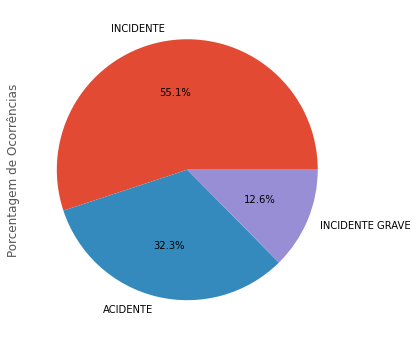

In [ ]:
plt.style.use("ggplot")

dados['tipo'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label="Porcentagem de Ocorrências" ,figsize=(6, 6))
plt.show()

Conforme análise do gráfico, podemos ver que os incidentes de menor gravidade são os mais comuns de ocorrerem, ficando com 51,1% das ocorrências.
Já os acidentes e os incidentes graves ficam com 48,9% das ocorrências, sendo 12,6% de incidentes graves e 32,3% de acidentes.

# Porcentagem de ocorrências

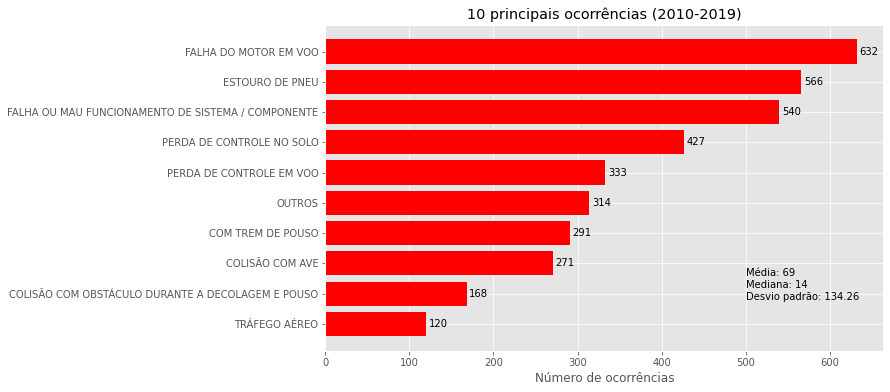

In [ ]:
descricao = Counter(dados['descricao'])
fase = sorted(descricao, key = descricao.get, reverse = True)
contador = sorted(list(descricao.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10, 6))

x=fase[:10]
y=contador[:10]

ax.barh(x, y, color='Red')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.title('10 principais ocorrências (2010-2019)')
plt.text(500, 7.4, 'Média: %d'%(np.mean(np.array(contador))))
plt.text(500, 7.8, 'Mediana: %d'%(np.median(np.array(contador))))
plt.text(500, 8.2, 'Desvio padrão: %.2f'%(static.stdev(contador)))

plt.show()

Análisando o gráfico vemos que o maior numero de ocorrencias registradas foi de falhas do motor durante o voo, com um 632 dos casos.

A média ficou em 69, a mediana em 14, e o desvio padrão em 134.26.

# Adicionando o dado exato nos gráficos em barras horizontais

In [ ]:
def number(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Dados por região

In [ ]:
regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(dados.loc[dados['tipo'] == i, ['estado']]['estado'])
                    if k in regioes[j]]) for j in regioes.keys()] for i in tipos}

dic_01['Região'] = list(regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

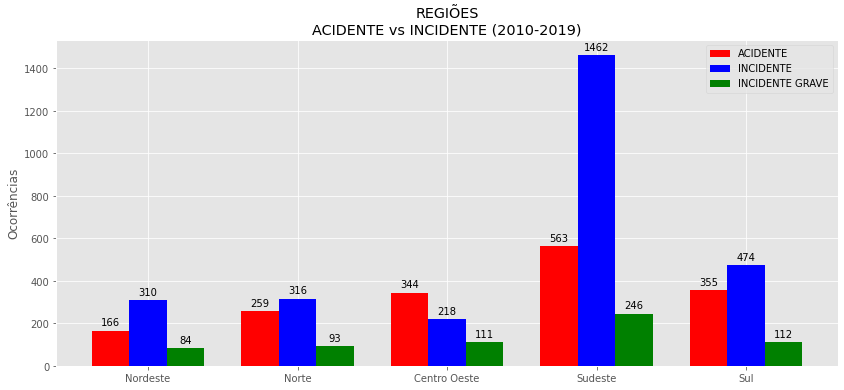

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

rects1 = ax.bar(r1, dados_regioes['ACIDENTE'], width, label='ACIDENTE', color='Red')
rects2 = ax.bar(r2, dados_regioes['INCIDENTE'], width, label='INCIDENTE', color='Blue')
rects3 = ax.bar(r3, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE', color='Green')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE (2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.legend()

number(rects1, ax)
number(rects2, ax)
number(rects3, ax)

plt.show()

Conforme a análise dos gráficos, podemos observar que a região com mais incidentes é a Sudeste, por obter uma maior porcentagem de voos, o numero de incidentes aumenta consideravelmente se comparado a outras regiôes.
A região com menos incidentes é a região Centro Oeste, que tambem possui uma quantidade menor de voos.
Já em relação aos acidentes, a região Sudeste ainde é a que possui o maior número, porem temos uma mudança quanto ao ultimo colocado, com a região Nordeste ficando com essa possição.

# Ocorrências por estado

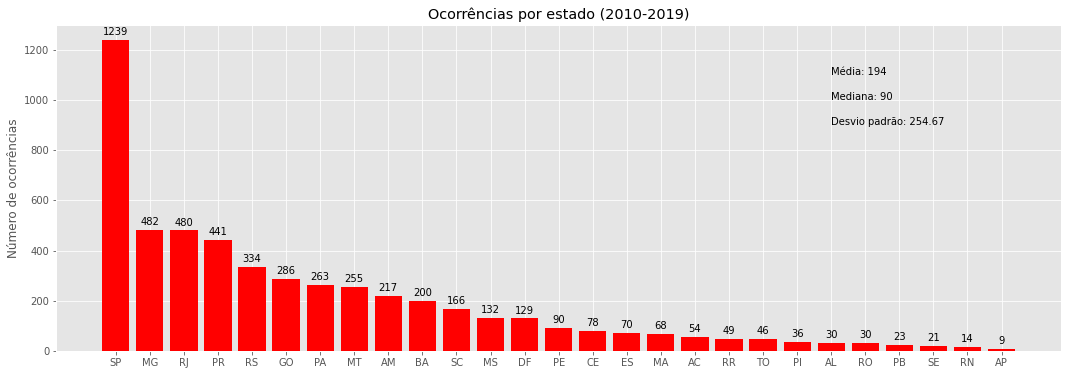

In [ ]:
estado = Counter(dados['estado'])
fase = sorted(estado, key = estado.get, reverse = True)
contador = sorted(list(estado.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 6))

x=fase
y=contador

rects1=ax.bar(x, y,color='Red')

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por estado (2010-2019)')
plt.text(21, 1100.9, 'Média: %d'%(np.mean(np.array(contador))))
plt.text(21, 1000.9, 'Mediana: %d'%(np.median(np.array(contador))))
plt.text(21, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador)))   

number(rects1, ax)

plt.show()

O estado com maior numero de ocorrências registradas foi SP, numero já esperado, pois é onde fica concentrado o maior numero de voos.

Já o que obteve menos ocorrencias foi o estado do AP, visto que possui um baixo numero de voos, tambem já erra esperado.

A media de ocorrências por estado ficou em 194, a mediana em 90, e o desvio padrão em 254.67.

# Ocorrências por cidade

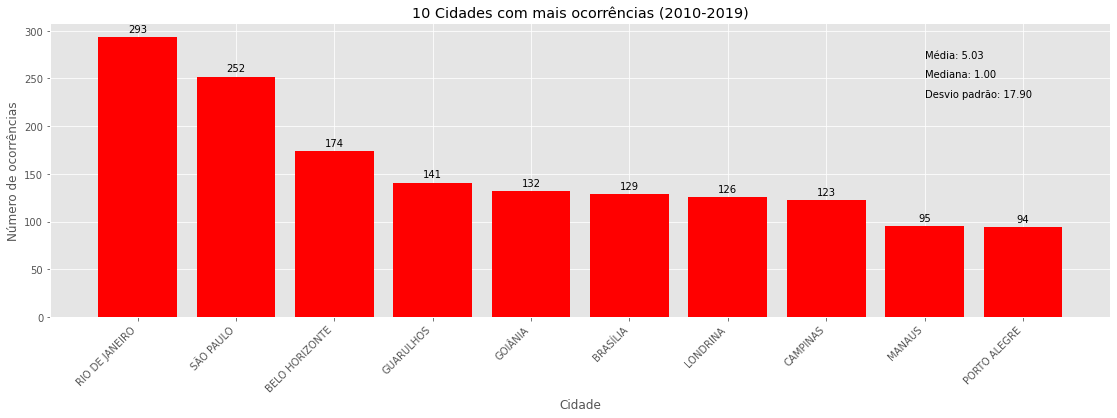

In [ ]:
cidade = Counter(dados['cidade'])
fase = sorted(cidade, key = cidade.get, reverse = True)
contador = sorted(list(cidade.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(19, 6))

x=fase[:10]
y=contador[:10]

rects1=ax.bar(x, y,color='Red')

plt.xlabel('Cidade')
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de ocorrências")
plt.title('10 Cidades com mais ocorrências (2010-2019)')
plt.text(8, 270.9, 'Média: %.2f'%(np.mean(np.array(contador))))
plt.text(8, 250.9, 'Mediana: %.2f'%(np.median(np.array(contador))))
plt.text(8, 230.8, 'Desvio padrão: %.2f'%(static.stdev(contador)))   

number(rects1, ax)

plt.show()

Podemos observar que a cidade com maior numero de ocorrências foi a do Rio de Janeiro com 293,por obter uma alta demanda de voos e a sua geografia não favorecer a esse tipo de transporte.

E a cidade com menos ocorrencias foi Porto Alegre, com 94 registros.

A média de ocorrência por cidade ficou em 5.03, a media na em 1.00, e o desvio padrão em 17.90.

# Regressão linear

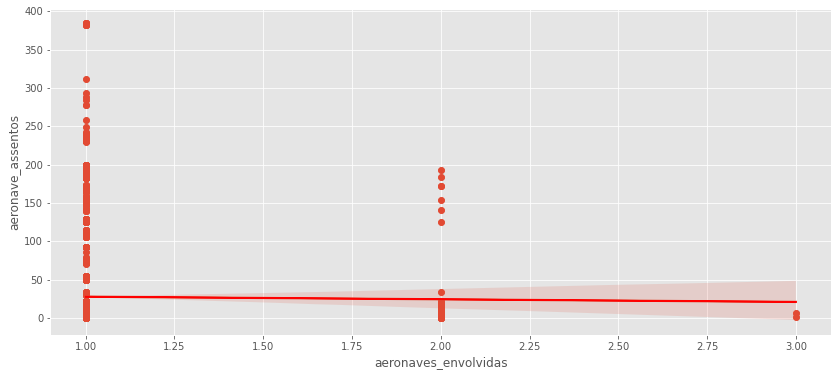

In [ ]:
dataframe = pd.DataFrame()
dataframe['x'] = dados['aeronaves_envolvidas']
dataframe['y'] = dados['aeronave_assentos']
x_values = dataframe[['x']]
y_values = dataframe[['y']]

plt.figure(figsize=(14,6))

plt.scatter(dataframe['x'].values, dataframe['y'].values)
sns.regplot(x='aeronaves_envolvidas', y='aeronave_assentos', data=dados)

fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

O eixo X do gráfico representa as aeronaves envolvidas, já o eixo Y do gráfico representa a quantidade de assentos destas aeronaves. Nota-se que o número de assentos foi crescendo no decorrer dos anos, principalmente pós-Segunda Guerra Mundial (1939-1945), já que a avião tornou-se um veículo predominantemente cívil, suplatando o uso militar.

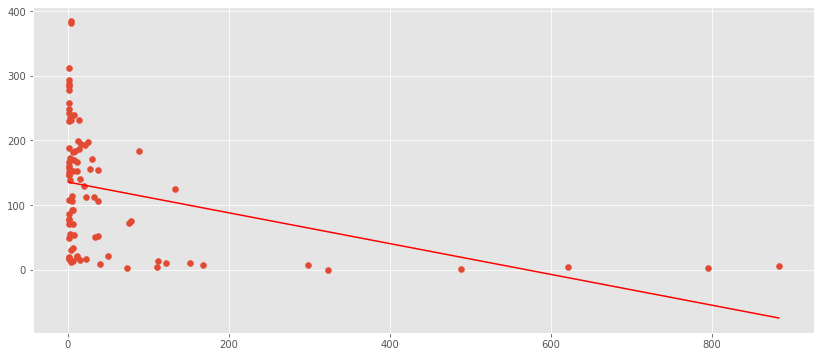

In [ ]:
aeronave_assentos = Counter(dados['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

dataframe = pd.DataFrame()
dataframe['y'] = fase_aeronave_assentos
dataframe['x'] = contador_aeronave_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]

plt.figure(figsize=(14,6))
plt.scatter(dataframe['x'].values, dataframe['y'].values)

fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

In [ ]:
aeronave_fase_operacao = Counter(dados['aeronave_fase_operacao'])
aeronave_fase = sorted(aeronave_fase_operacao, key = aeronave_fase_operacao.get, reverse = True)
contador_aeronave_fase_operacao = sorted(list(aeronave_fase_operacao.values()), reverse = True)

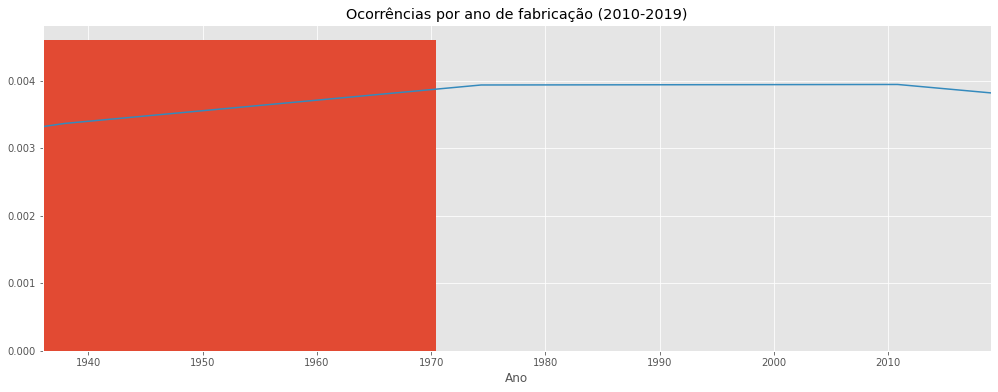

In [ ]:

plt.style.use("ggplot")

fig, axes = plt.subplots(figsize=(17,6))

x= dados.aeronave_ano_fabricacao
plt.hist(x, density=True, bins=85, rwidth=0.5)
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
axes.set_xlim(xmin=1936) 
axes.set_xlim(xmax=2019) 
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.xlabel('Ano')
plt.title('Ocorrências por ano de fabricação (2010-2019)')

plt.show()

# Considerações finais

O principal objetivo desse trabalho é realizar o levantamento estatístico de acidentes aéreos entre os anos de 2010 a 2019, buscando apresentar, de forma gráfica, informações que envolvem a aviação.

As principais ocorrências abordadas serão: região, tipo de aeronave, principais ocorrências e ocorrências por ano de fabricação, entre outros.

Os principais resultados da análise foram:

A região com mais incidentes é a Sudeste, por obter uma maior porcentagem de voos, o numero de incidentes aumenta consideravelmente se comparado a outras regiôes. A região com menos incidentes é a região Centro Oeste, que tambem possui uma quantidade menor de voos. Já em relação aos acidentes, a região Sudeste ainde é a que possui o maior número, porem temos uma mudança quanto ao ultimo colocado, com a região Nordeste ficando com essa possição.

Podemos observar que a cidade com maior numero de ocorrências foi a do Rio de Janeiro com 293,por obter uma alta demanda de voos e a sua geografia não favorecer a esse tipo de transporte.
E a cidade com menos ocorrencias foi Porto Alegre, com 94 registros.

# Relatório final

O trabalho apresentado tem como objetivo apresentar as análises feita com
estudos a partir da aula usando a linguagem de programação Phython utilizando
principalmente a biblioteca pandas que é usada bastante para a análise de dados, o
intuito do trabalho é apresentar as análises baseada na base de dados ocorrências Cenipa, que basicamente são os acidentes aéreos que ocorreram no Brasil.
No trabalho há uma análise tanto das quedas por regiões como por tipo de avião
o qual resultou em alguma estatística de queda, algumas das funções ou biblioteca
como podemos chamar, foram utilizadas para formatar visualmente os gráficos,
assim como outras para a analise dos dados que foram disponibilizados através do
arquivo CSV.

# Referências Bibliograficas

CENIPA, FCA 58-1 Ocorrências Aeronáuticas: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações e Prevenção de Acidentes Aeronáuticos. 2016.

COUTINHO, Thiago. O que é a biblioteca Pandas?. Medium,[S.I.], 2020.Disponível em:https://medium.com/tech-grupozap/introdu%C3%A7%C3%A3o-a-biblioteca-pandas-89fa8ed4fa38.

JUNIOR, Luiz S.. Entendendo a biblioteca NumPy. Medium, [S.I.], 2018.Disponível em:https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355.

MACHADO, Alysson. Biblioteca Matplotlib do Python. Medium, [S.I.], 2020.Disponível em:https://medium.com/@alyssonmachado388/biblioteca-matplotlib-do-python-5e32104439d0.

SCHÖNHOFEN, Ricardo D.. Biblioteca Seaborn com o matplotlib. Vooo, [S.I.],2017.Disponível em:https://www.vooo.pro/insights/biblioteca-seaborn-com-o-matplotlib/.

SciPy. Tmfilho,[S.I.]. [?]. Disponível em:https://tmfilho.github.io/pyestbook/math/03_scip.html#:~:text=A%20biblioteca%20SciPy%20disponibiliza%20muitas,.scipy.org%2Fdoc..

PYTHON. Collections — Tipos de dados do contêiner. [S.I.], [?] ,Disponível em: https://docs.python.org/3/library/collections.html.

PYTHON. Statistics — Funções estatiticas. [S.I.], [?] ,Disponível em: https://docs.python.org/pt-br/3/library/statistics.html.

Scikit-learn - aplicação prática de machine learning. Didatica.tech[S.I], 2022. Disponível em: https://didatica.tech/a-biblioteca-scikit-learn-pyhton-para-machine-learning/#:~:text=O%20scikit%2Dlearn%20%C3%A9%20uma,aplica%C3%A7%C3%A3o%20pr%C3%A1tica%20de%20machine%20learning.